# Data Cleaning & Preparation

In [28]:
pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
import ydata_profiling as pp
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data_original = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/EDA1/Cardiotocographic.csv")

In [31]:
data_original

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [32]:
type(data_original)
data_original.shape

(2126, 14)

In [33]:
data_original.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

### Data Cleaning & Preparation

In [34]:
#missing values
data_original.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [35]:
data_to_numeric = data_original.apply(pd.to_numeric, errors='coerce')

In [36]:
data_to_numeric.isna()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
#dropping null values
data_to_numeric.dropna(inplace=True)

### Outliers on Graph

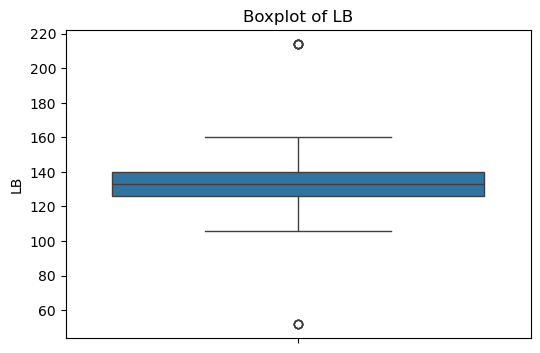

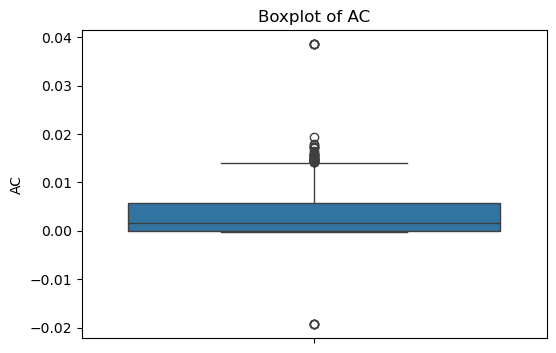

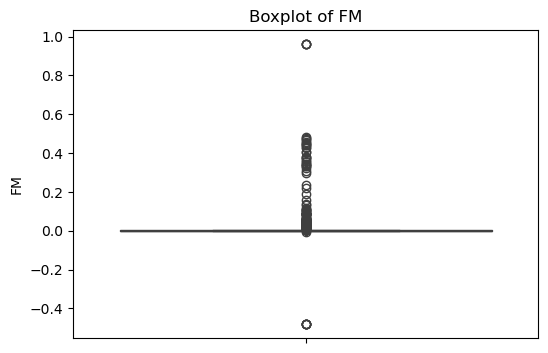

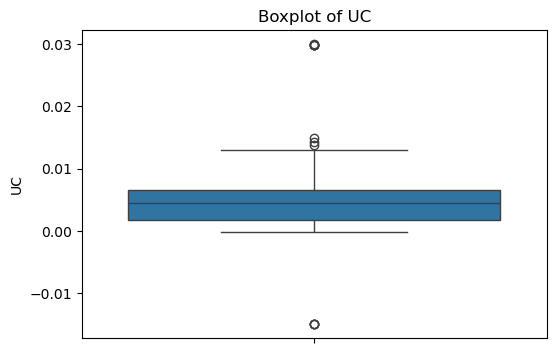

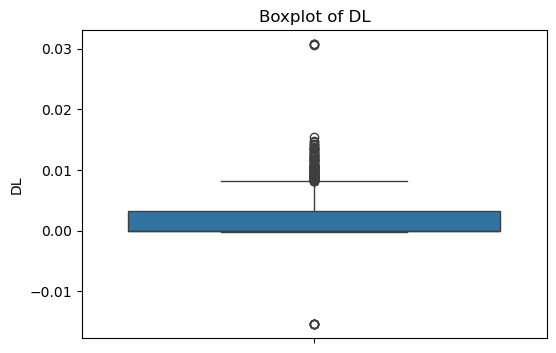

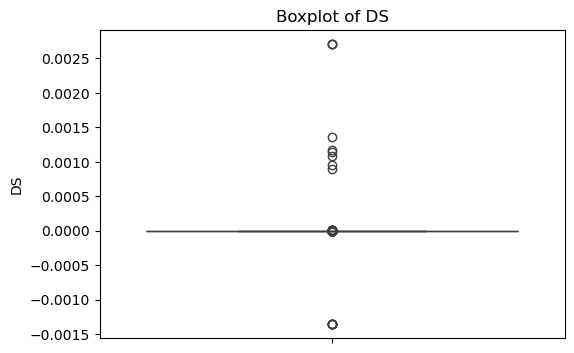

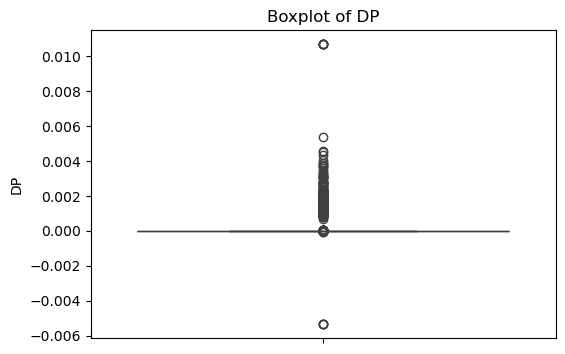

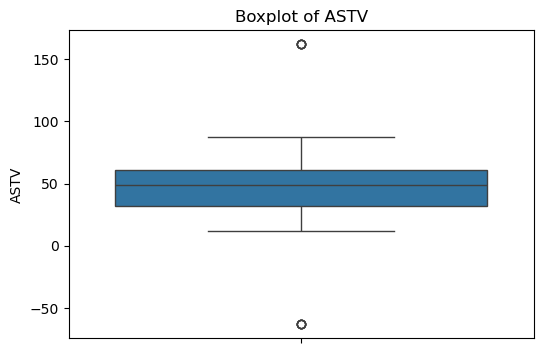

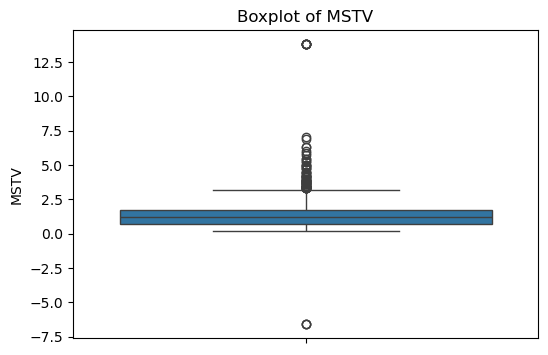

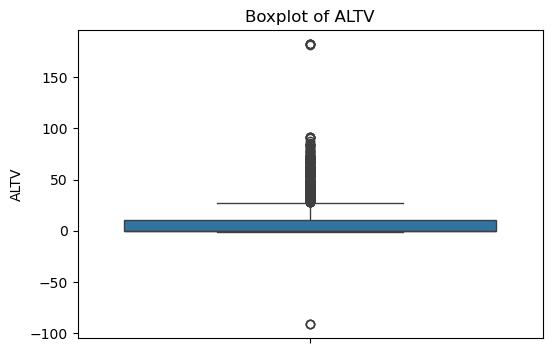

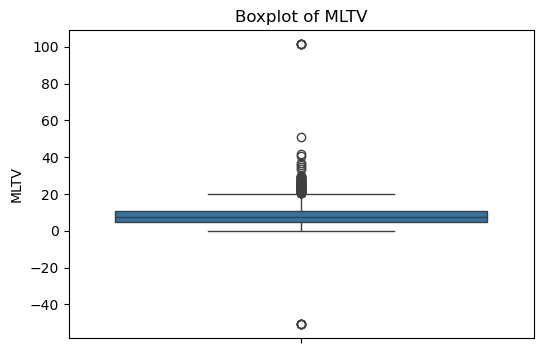

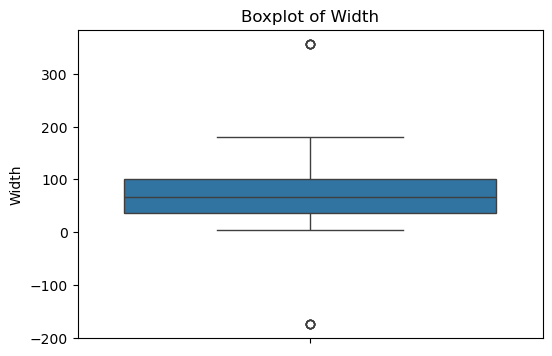

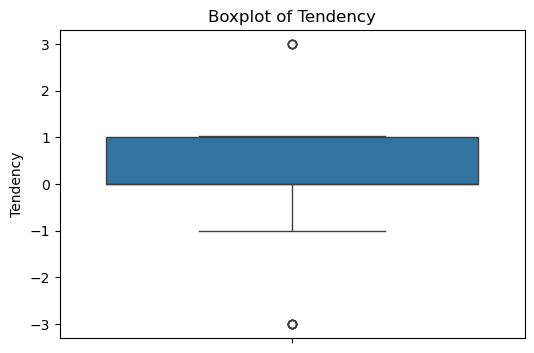

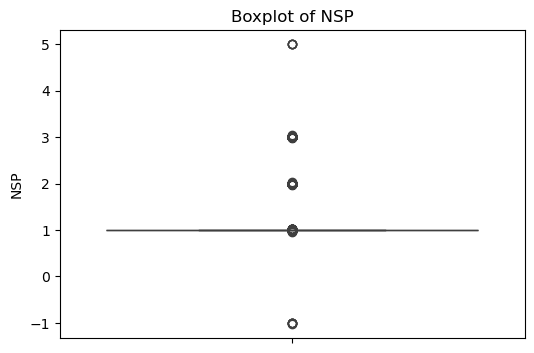

In [38]:
for col in data_to_numeric.columns:
    plt.figure(figsize=(6, 4))  # Optional: set figure size
    sns.boxplot(y=data_to_numeric[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout

### Handling outliers

In [39]:
Q1 = data_to_numeric.quantile(0.25)
Q3 = data_to_numeric.quantile(0.75)
IQR = Q3 - Q1
data_inliers = data_to_numeric[~((data_to_numeric < (Q1 - 1.5 * IQR)) | (data_to_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
data_inliers.shape

(885, 14)

In [41]:
data_summary = data_to_numeric.describe().T
data_summary[['mean', '50%', 'std', 'min', '25%', '75%', 'max']]

,mean,50%,std,min,25%,75%,max
LB,133.343598,133.000000,11.270154,51.842487,126.000000,140.000000,214.000000
AC,0.003202,0.001631,0.004324,-0.019284,0.000000,0.005650,0.038567
FM,0.009963,0.000000,0.067870,-0.480634,0.000000,0.002554,0.961268
UC,0.004388,0.004484,0.003350,-0.014925,0.001838,0.006536,0.030002
DL,0.001892,0.000000,0.003348,-0.015393,0.000000,0.003289,0.030769
DS,0.000003,0.000000,0.000142,-0.001353,0.000000,0.000000,0.002706
DP,0.000175,0.000000,0.000840,-0.005348,0.000000,0.000000,0.010695
ASTV,46.996929,49.000000,18.847737,-63.000000,32.000000,61.000000,162.000000
MSTV,1.361006,1.200000,1.173164,-6.600000,0.700000,1.700000,13.800000
ALTV,10.353647,0.000000,21.282102,-91.000000,0.000000,11.000000,182.000000


### Data Visualization

Histogram

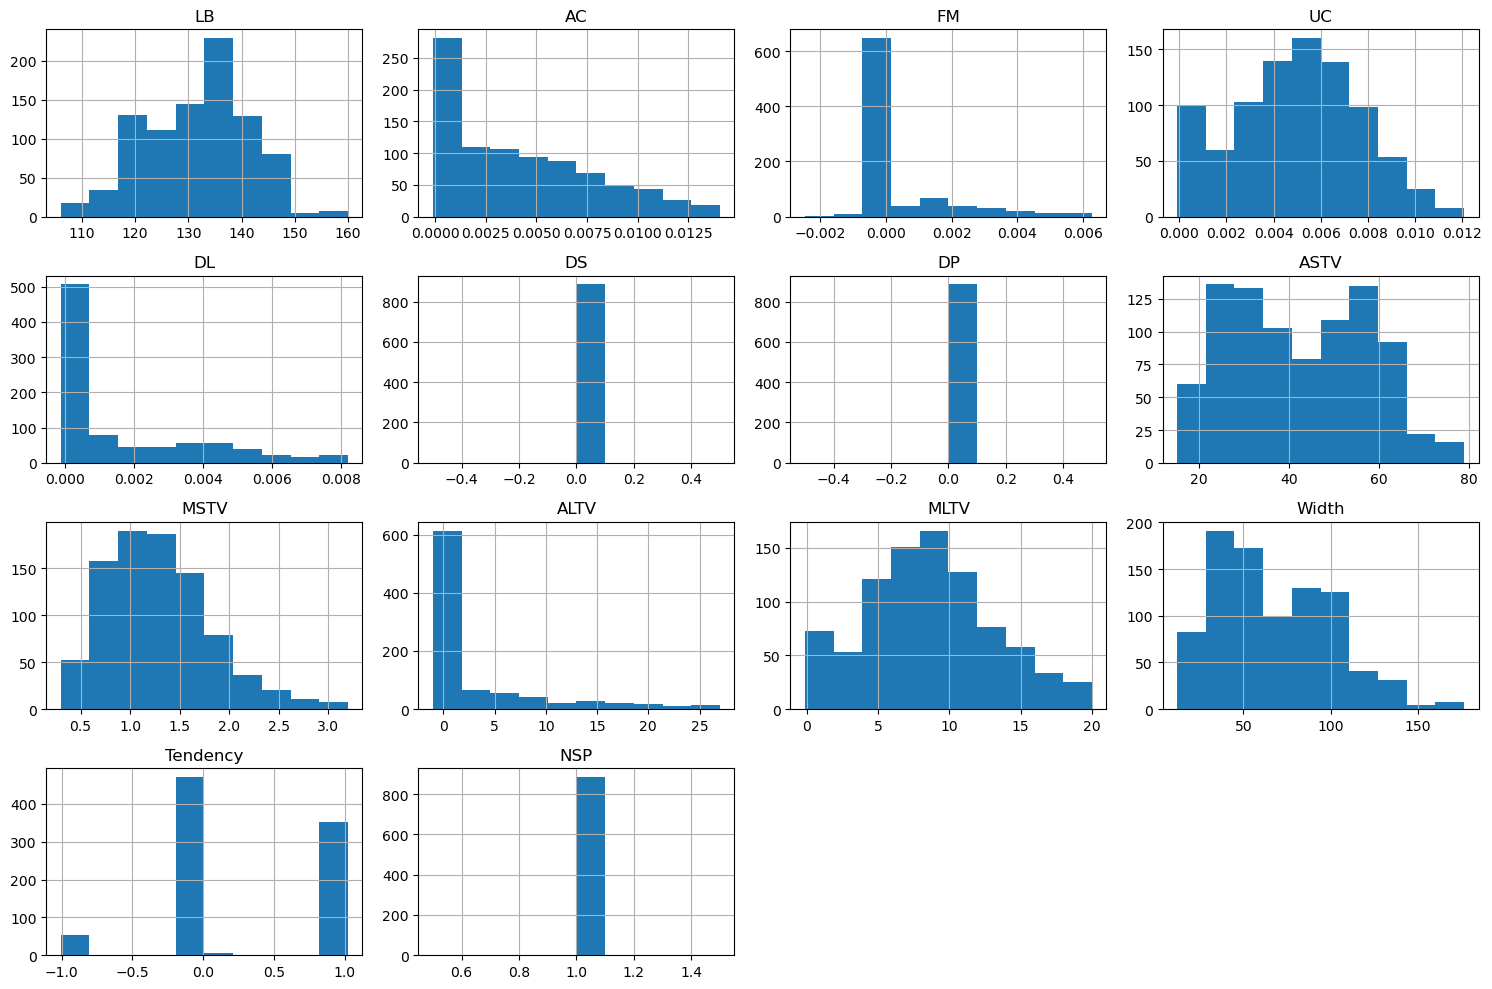

In [48]:
data_inliers.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Boxplot

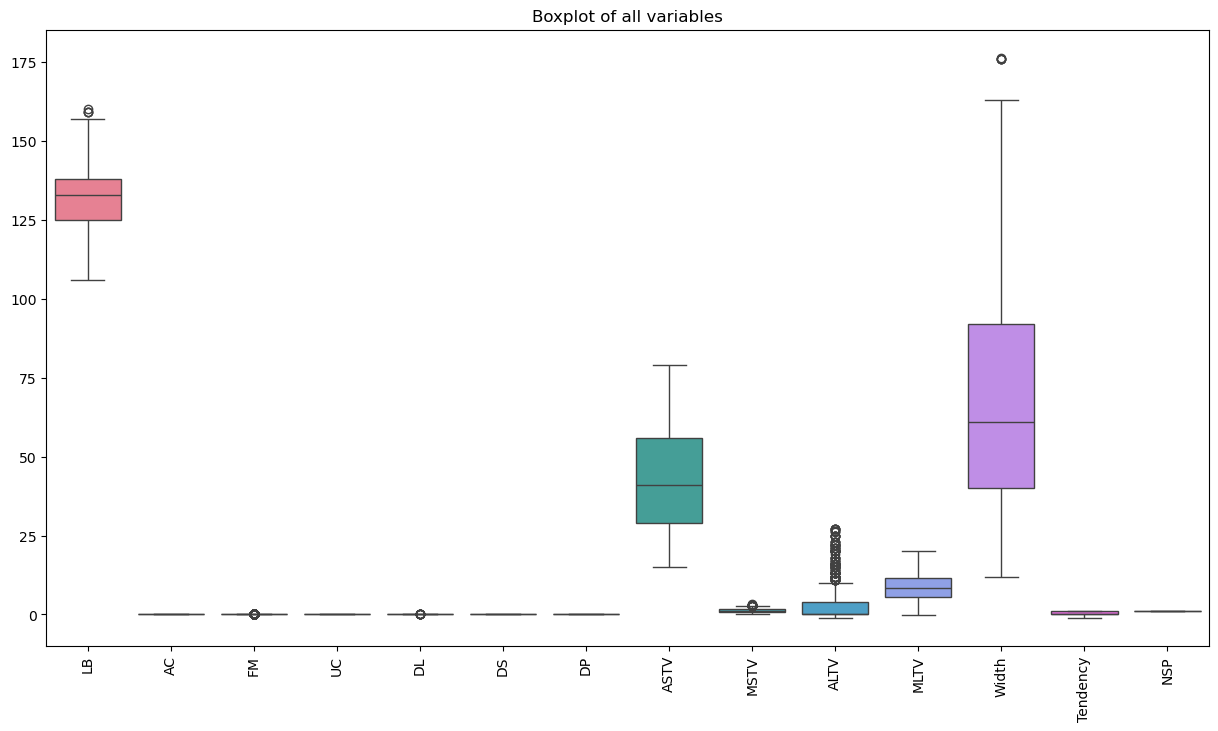

In [44]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_inliers)
plt.xticks(rotation=90)
plt.title("Boxplot of all variables")
plt.show()

Correlation Heatmap

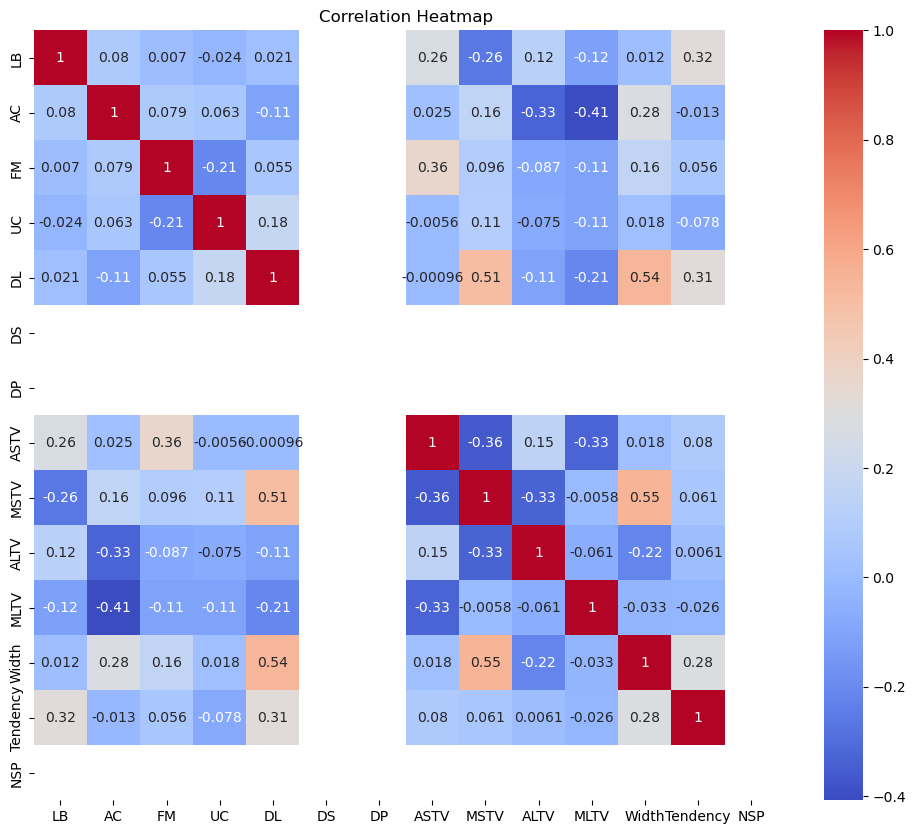

In [46]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_inliers.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Pair Plot (subset for simplicity)

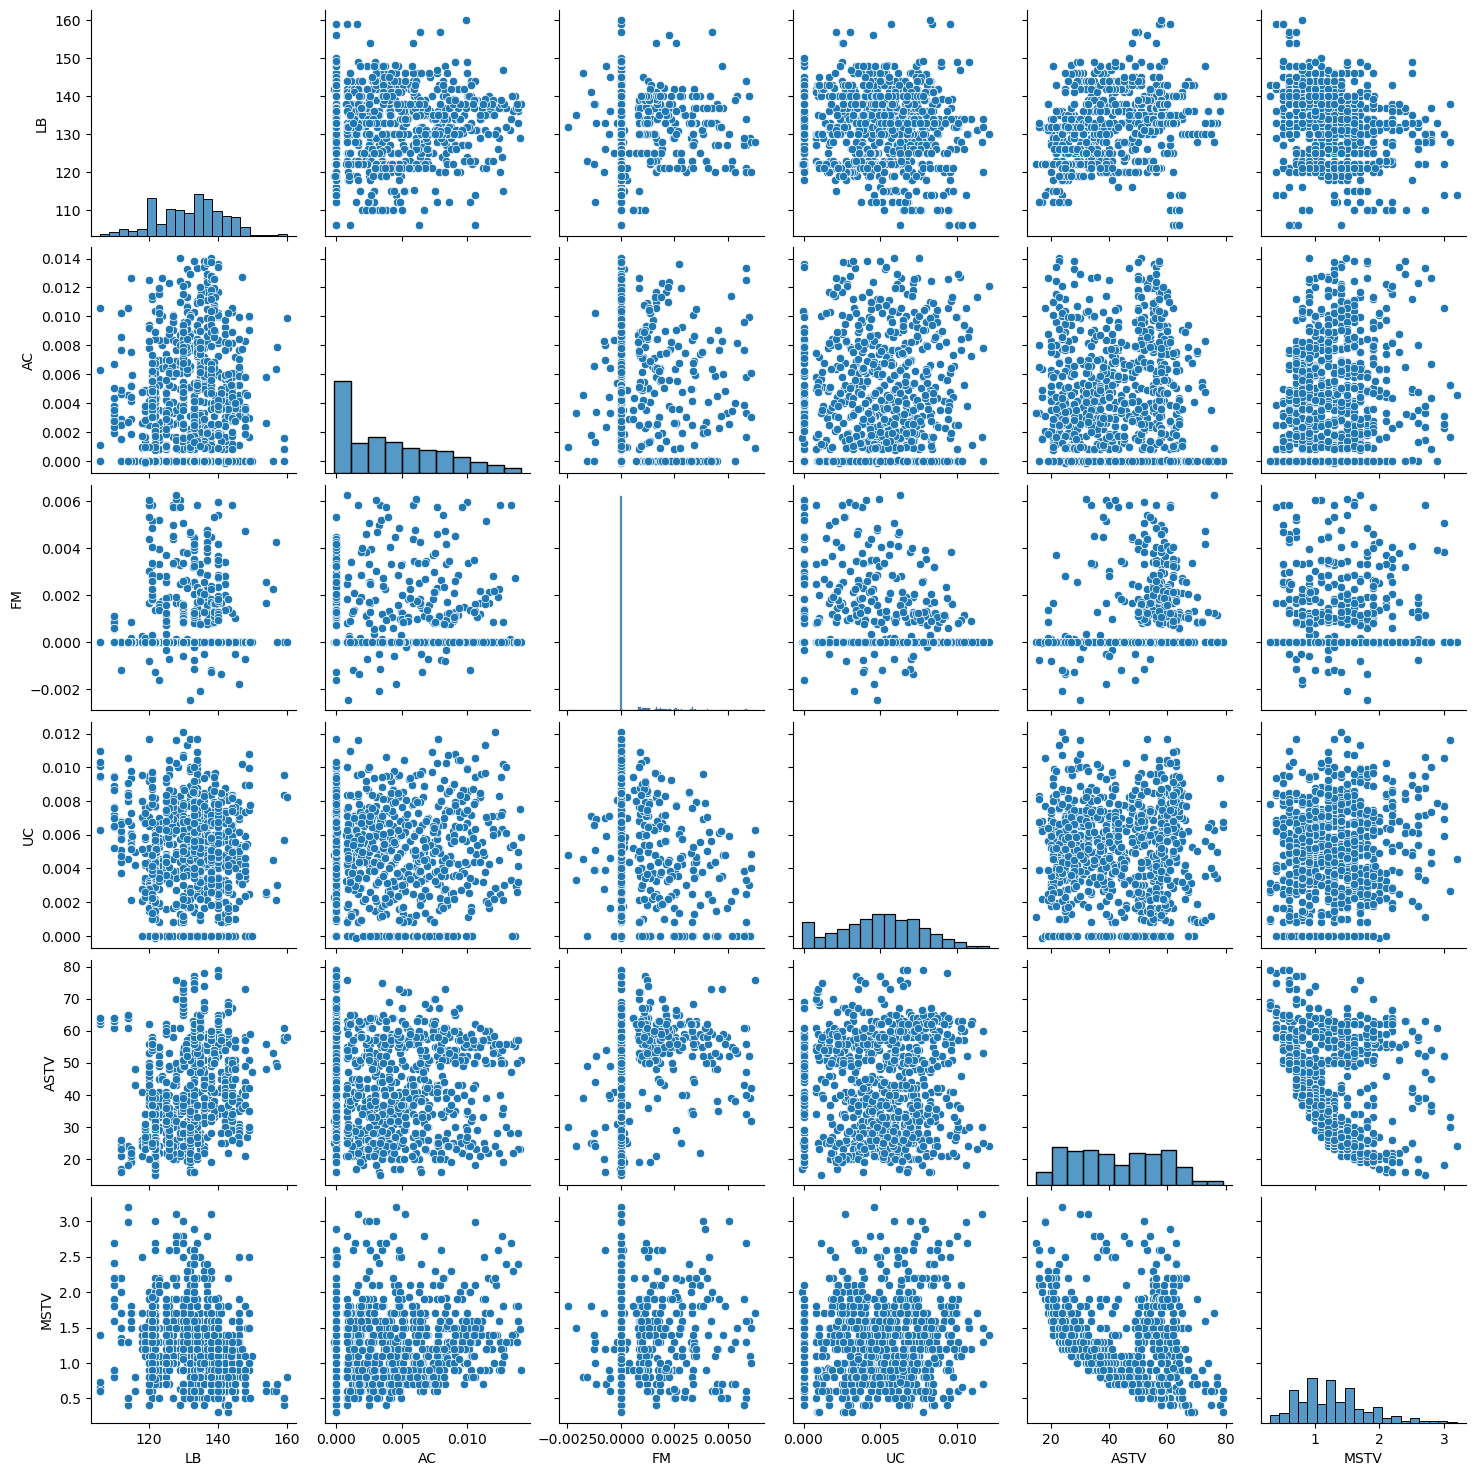

In [47]:
sns.pairplot(data_inliers[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV']])
plt.show()

In [51]:
correlation = data_inliers.corr()
#Display sorted correlations of 'LB' with other variables
correlation['LB'].sort_values(ascending=False)

LB          1.000000
Tendency    0.315552
ASTV        0.264214
ALTV        0.124711
AC          0.080275
DL          0.020557
Width       0.011514
FM          0.007039
UC         -0.024101
MLTV       -0.118642
MSTV       -0.259457
DS               NaN
DP               NaN
NSP              NaN
Name: LB, dtype: float64


### Conclusion

- The dataset contains measurements of fetal health indicators and uterine activity.
- Several variables show strong correlations (e.g., ASTV and MSTV).
- The cleaned dataset shows typical ranges and distributions.
- These findings may help in early detection of fetal distress and improve decision-making during pregnancy monitoring.

Further work could include clustering or classification based on these features.